In [8]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

pred1 = model.predict(X_test)

print("Without scaling R2:", r2_score(y_test, pred1))

Without scaling R2: 0.5757877060324511


In [10]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
model2 = LinearRegression()
model2.fit(X_train_scaled, y_train)

pred2 = model2.predict(X_test_scaled)

print("With scaling R2:", r2_score(y_test, pred2))

With scaling R2: 0.575787706032451


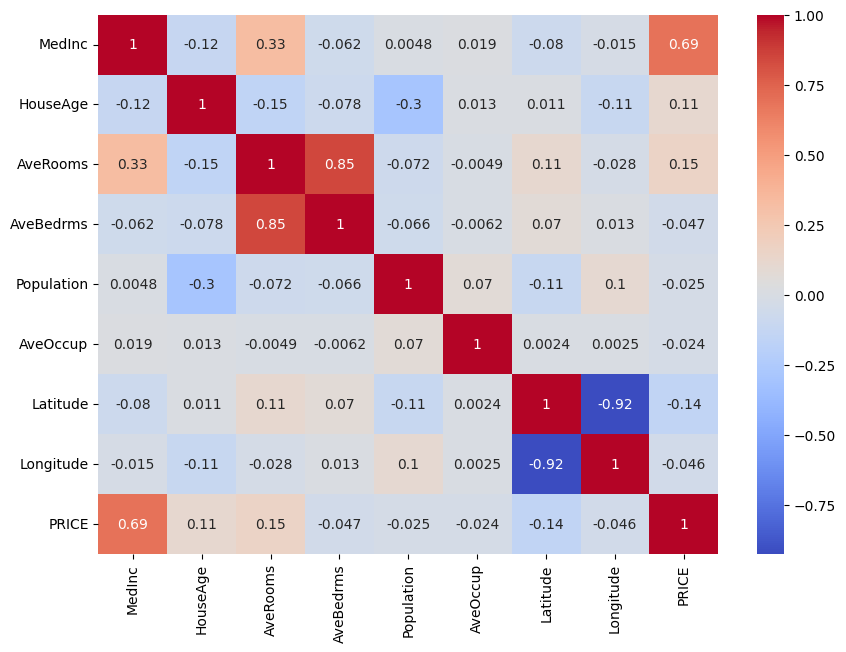

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

df = X.copy()
df["PRICE"] = y

plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [13]:
X_reduced = X.drop(columns=["AveOccup", "Population"])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42
)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print("R2 after feature removal:", r2_score(y_test, pred))

R2 after feature removal: 0.5749693819995392
